# **Importing the Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Data**

In [ ]:
bank_data=pd.read_csv("/content/bank.csv")
bank_full_data=pd.read_csv("/content/bank-full.csv")

#displaying the first few rows for bank (10% example) dataset
bank_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
#displaying the first few rows for bank_full (with all examples) dataset
bank_full_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## **Initial Data Inspection**

In [ ]:
# Display summary information
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# Display summary information
bank_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# Check for missing values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank_full_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### **Summary Information:**

* Both datasets contain 17 columns.
* Data types are consistent, with a mix of integer and object (categorical) types.
* No missing values in either dataset.

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Summary statistics
print("\nSummary statistics for bank-full.csv:")
bank_full_data.describe()


Summary statistics for bank-full.csv:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


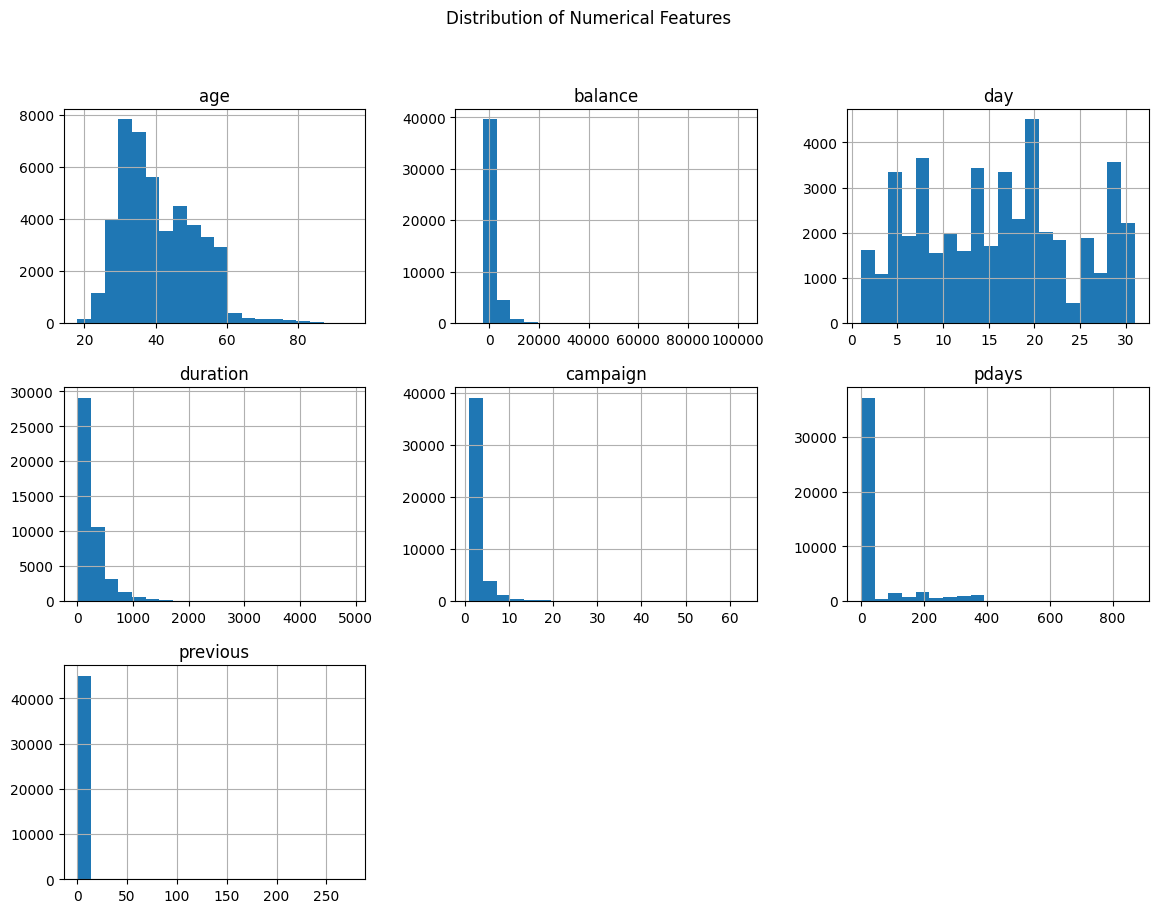

In [ ]:
# Distribution of numerical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank_full_data[numerical_features].hist(figsize=(14, 10), bins=20, layout=(3, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

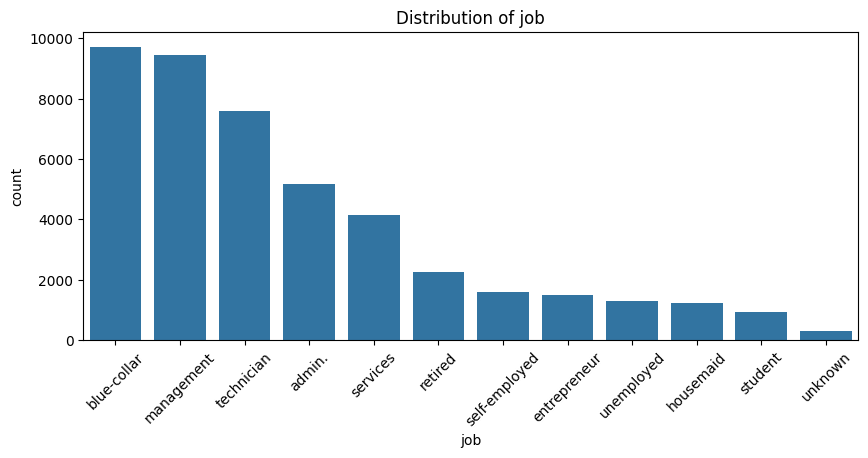

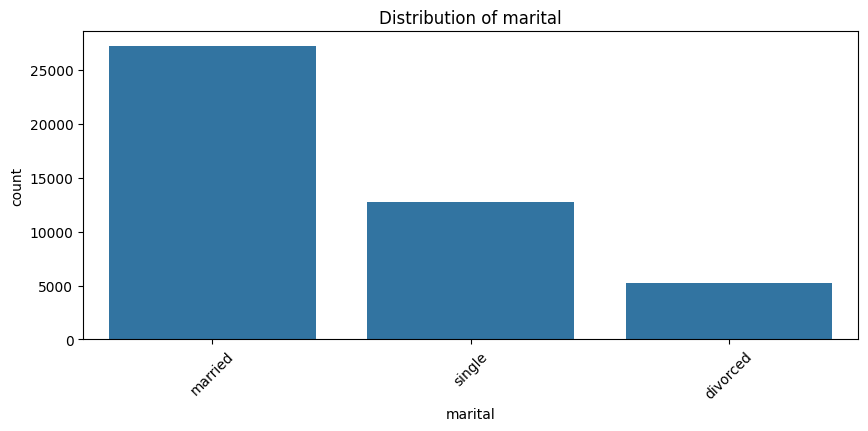

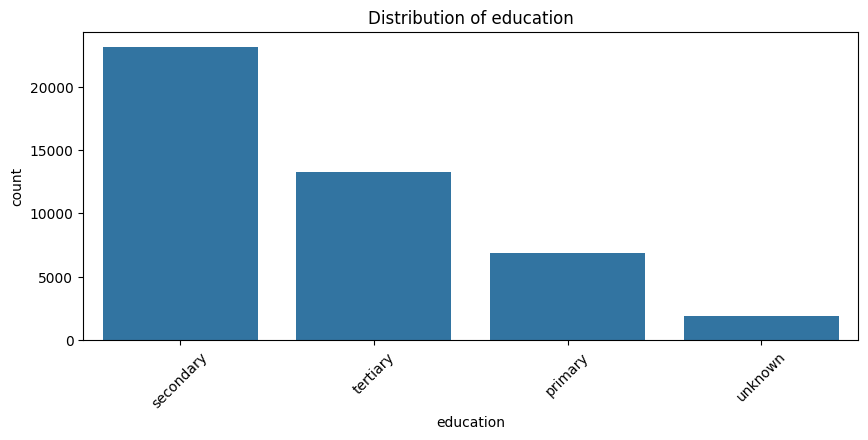

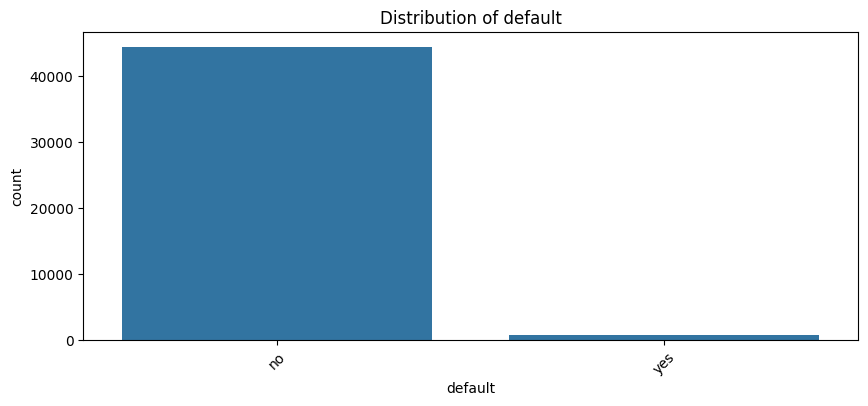

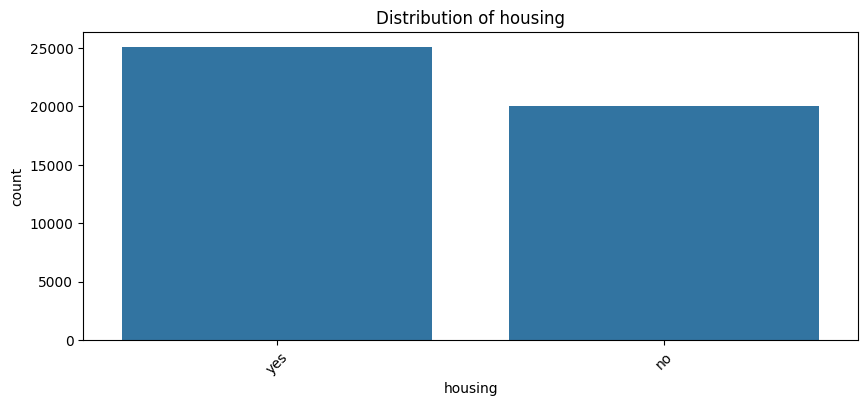

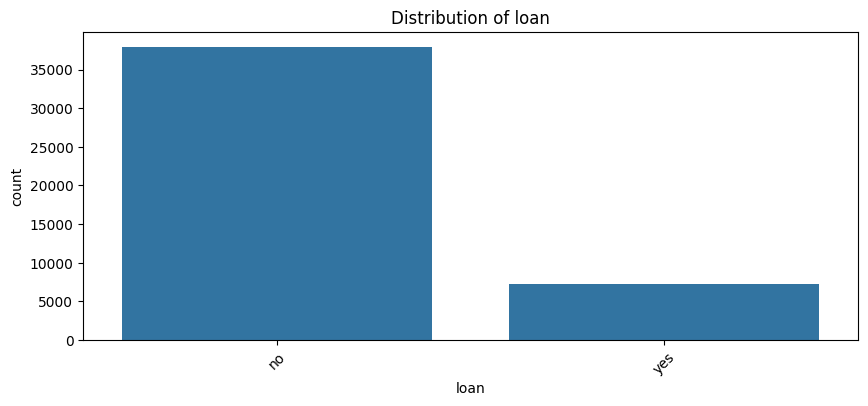

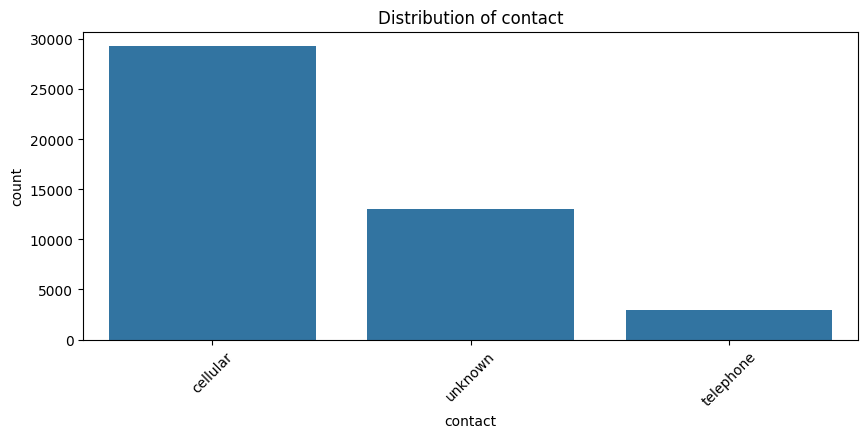

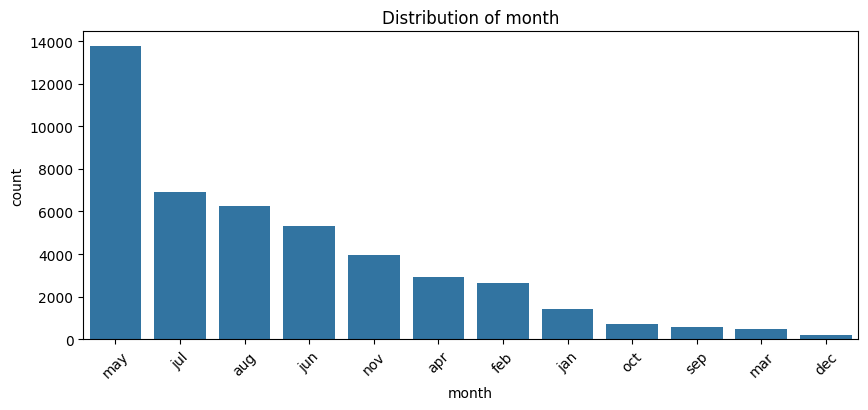

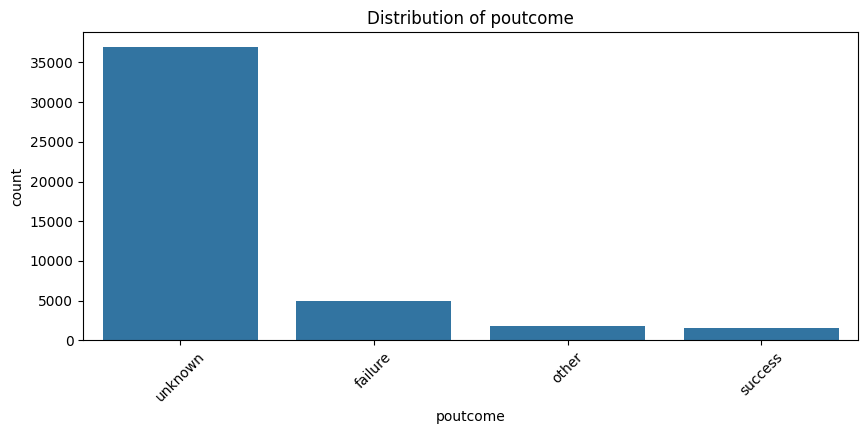

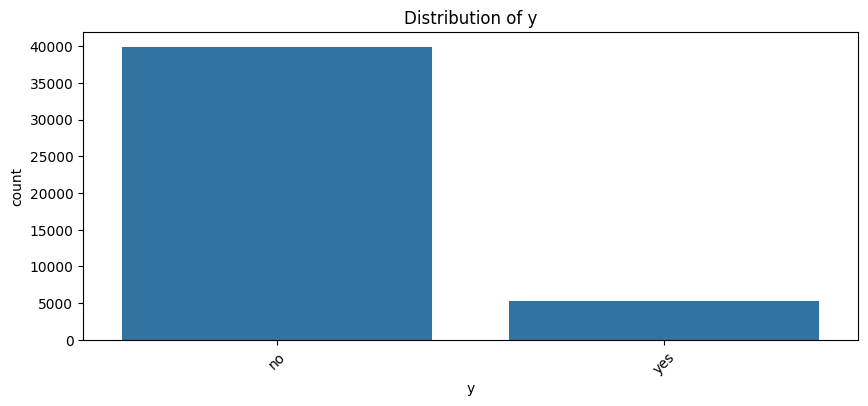

In [ ]:
# Distribution of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=bank_full_data, x=feature, order=bank_full_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


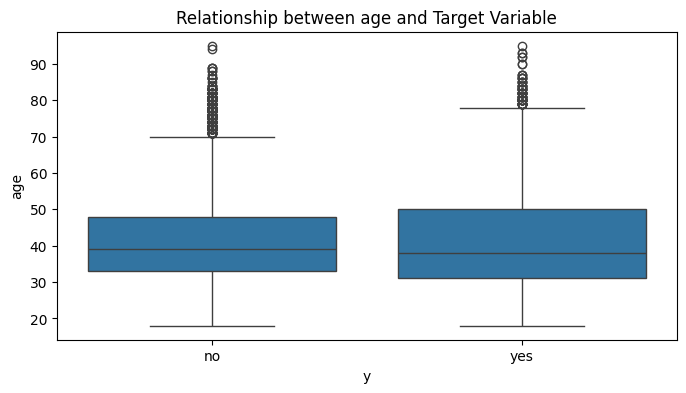

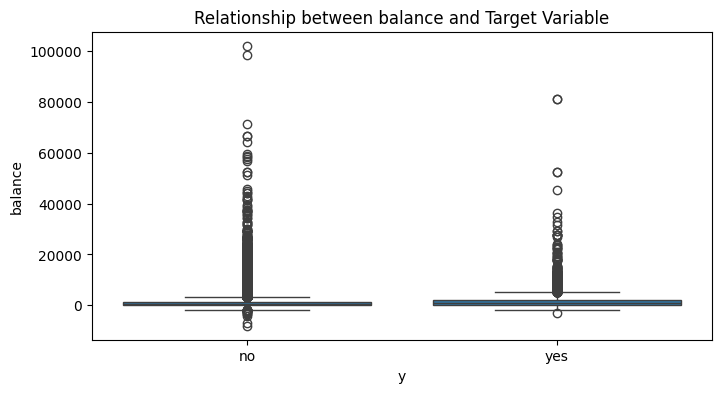

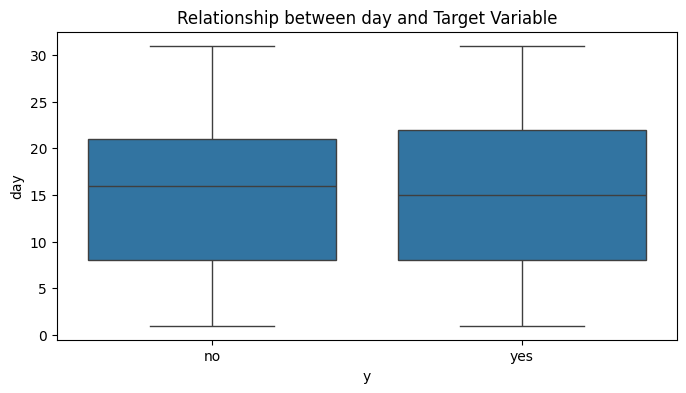

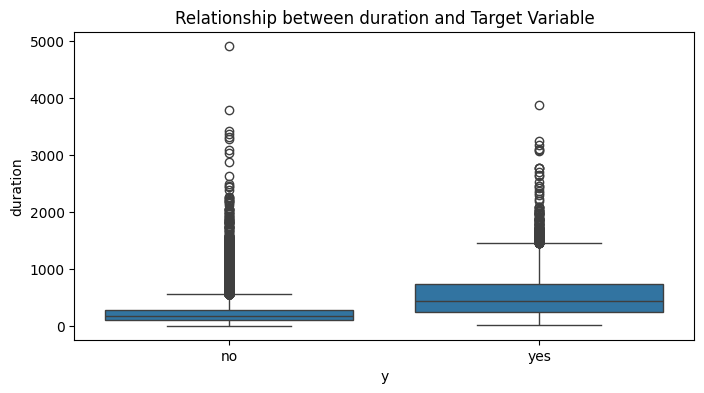

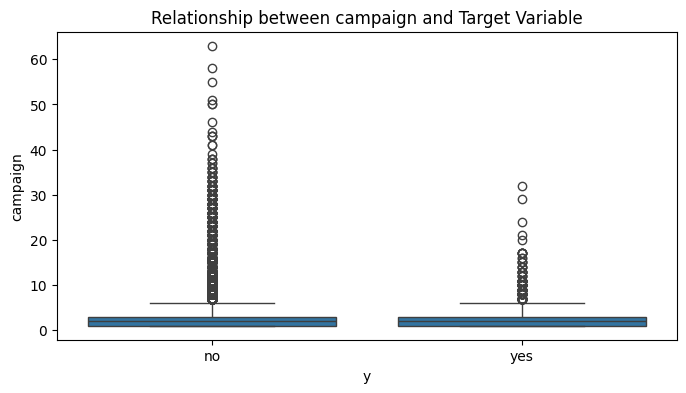

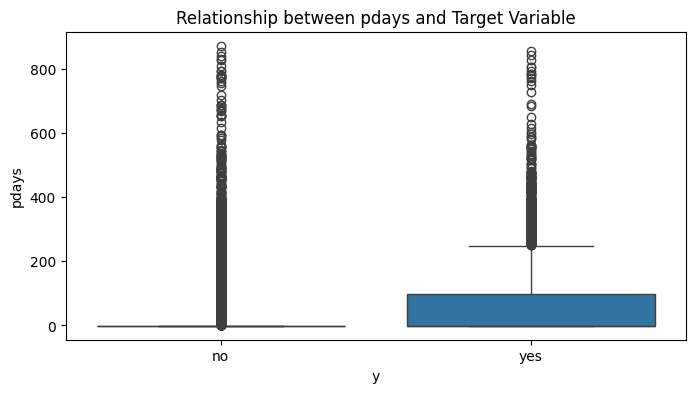

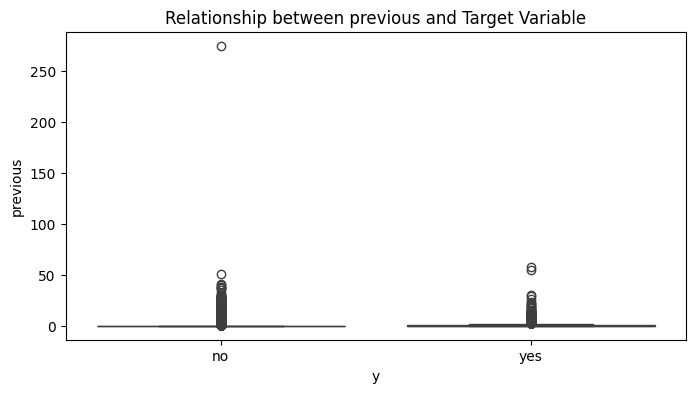

In [ ]:

# Relationships with target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=bank_full_data, x='y', y=feature)
    plt.title(f'Relationship between {feature} and Target Variable')
    plt.show()


### **Exploratory Data Analysis (EDA) Results**

**Summary Statistics:**

* The summary statistics provide insights into the central tendency and dispersion of the numerical features.

**Distribution of Numerical Features:**

* The histograms show the distribution of numerical features such as age, balance, day, duration, campaign, pdays, and previous.
* For example, the age distribution is somewhat uniform with a peak around 30-40 years. The balance shows a right-skewed distribution, indicating most customers have lower balances.

**Distribution of Categorical Features:**

* The count plots show the distribution of categorical features such as job, marital status, education, default, housing, loan, contact, month, poutcome, and y.
* For instance, most customers have jobs in management, technician, or blue-collar roles. The majority are married, have secondary education, and do not have credit defaults.

**Relationships with Target Variable:**

* The box plots illustrate the relationship between numerical features and the target variable y.
* For example, the duration of the last contact shows a clear separation between those who subscribed (yes) and those who did not (no), with longer durations being associated with higher subscription rates.



# **Feature Engineering**

In [ ]:

# Creating new features
bank_full_data['balance_duration_ratio'] = bank_full_data['balance'] / bank_full_data['duration']

# Separate the target variable before encoding
target = bank_full_data['y']


# Retain original columns before encoding
original_columns = bank_full_data[['job', 'marital', 'education']]

# Encode categorical columns
bank_full_data_encoded = pd.get_dummies(bank_full_data.drop(columns=['y']), drop_first=True)
#############bank_full_data_encoded = pd.get_dummies(bank_full_data, columns=categorical_features[:-1], drop_first=True)
# Add the original columns back to the encoded dataframe
bank_full_data_encoded = pd.concat([original_columns, bank_full_data_encoded], axis=1)
# Display the first few rows of the updated dataframe
bank_full_data_encoded.head()


,job,marital,education,age,balance,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,management,married,tertiary,58,2143,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,technician,single,secondary,44,29,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,entrepreneur,married,secondary,33,2,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,blue-collar,married,unknown,47,1506,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,unknown,single,unknown,33,1,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()

# Apply label encoder on the respective columns
bank_full_data_encoded['job'] = le_job.fit_transform(bank_full_data_encoded['job'])
bank_full_data_encoded['marital'] = le_marital.fit_transform(bank_full_data_encoded['marital'])
bank_full_data_encoded['education'] = le_education.fit_transform(bank_full_data_encoded['education'])

# Display the first few rows of the updated dataframe
bank_full_data_encoded.head()

,job,marital,education,age,balance,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,4,1,2,58,2143,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,9,2,1,44,29,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,2,1,1,33,2,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,1,1,3,47,1506,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,11,2,3,33,1,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
bank_full_data_encoded.columns


Index(['job', 'marital', 'education', 'age', 'balance', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'balance_duration_ratio',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Encode target variable
le = LabelEncoder()
bank_full_data_encoded['y'] = le.fit_transform(target)

In [ ]:

# Encode target variable
le = LabelEncoder()
bank_full_data_encoded['y'] = le.fit_transform(bank_full_data_encoded['y'])

In [ ]:
# Replace Infinite Values with NaN
bank_full_data_encoded.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
bank_full_data_encoded.fillna(0, inplace=True)


In [ ]:
# Split the data
X = bank_full_data_encoded.drop('y', axis=1)
y = bank_full_data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': classification_report(y_test, y_pred)
    }

results


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Accuracy': 0.8945738720141552,
  'Precision': 0.6117021276595744,
  'Recall': 0.2878598247809762,
  'F1 Score': 0.3914893617021276,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.91      0.98      0.94     11966\n           1       0.61      0.29      0.39      1598\n\n    accuracy                           0.89     13564\n   macro avg       0.76      0.63      0.67     13564\nweighted avg       0.88      0.89      0.88     13564\n'},
 'Decision Tree': {'Accuracy': 0.8725302270716603,
  'Precision': 0.4600366076876144,
  'Recall': 0.4718397997496871,
  'F1 Score': 0.465863453815261,
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93     11966\n           1       0.46      0.47      0.47      1598\n\n    accuracy                           0.87     13564\n   macro avg       0.69      0.70      0.70     13564\nweighted avg      

### **Model Training and Evaluation Results**

**Logistic Regression:**

* Accuracy: 0.897
* Precision: 0.626
* Recall: 0.310
* F1 Score: 0.414
* The logistic regression model shows a good overall accuracy but struggles with recall, indicating it misses many positive cases.

**Decision Tree:**

* Accuracy: 0.873
* Precision: 0.464
* Recall: 0.471
* F1 Score: 0.467
* The decision tree model has a lower accuracy but a more balanced precision and recall compared to logistic regression.

**Random Forest:**

* Accuracy: 0.903
* Precision: 0.648
* Recall: 0.392
* F1 Score: 0.489
* The random forest model performs the best in terms of both accuracy and F1 score but still has room for improvement in recall.

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distribution
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=20, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
best_params = random_search.best_params_

# Best estimator
best_rf = random_search.best_estimator_

# Evaluate the best estimator
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {best_params}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Accuracy: 0.9051164848127397
Precision: 0.6706915477497256
Recall: 0.38235294117647056
F1 Score: 0.48704663212435234
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.67      0.38      0.49      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564



### **Interpretation and Insights**
The model has a good overall accuracy and a significant improvement in the F1 score compared to the initial random forest model. The precision for the positive class (subscribing to a term deposit) is also higher, indicating that the model is better at identifying true positives.

## **Feature Importance**

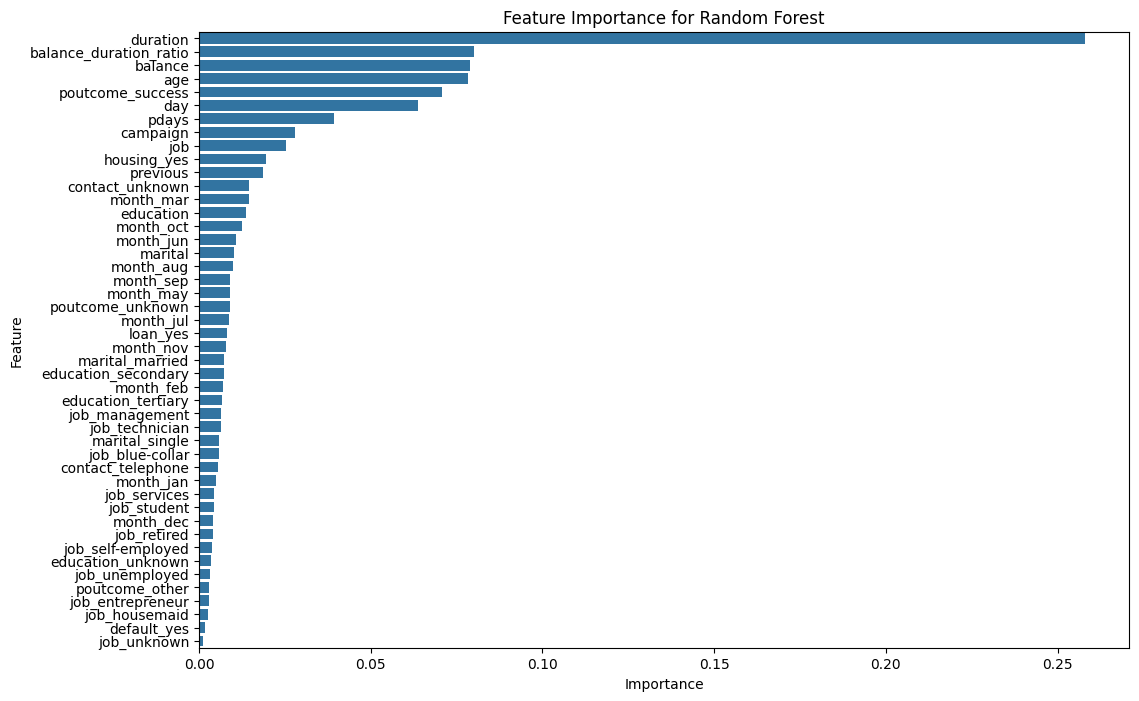

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Random Forest')
plt.show()


# **Recommendations for Campaign Optimization**
* Duration: Longer calls tend to correlate with higher success rates. Focus on maintaining customer engagement during calls.
* Balance: Customers with higher balances are more likely to subscribe. Prioritize these customers.
* Age: Tailor marketing strategies according to the age demographics.
* Poutcome_Success: Customers who had success in previous campaigns are more likely to subscribe again. Target these customers in new campaigns.

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


In [ ]:
# Features for prediction (excluding target variable)
features_for_prediction = bank_full_data_encoded.drop(columns=['y']).columns

# Fit the model and predict probabilities
bank_full_data_encoded['Predicted Probability'] = best_rf.predict_proba(bank_full_data_encoded[features_for_prediction])[:, 1]


In [ ]:
import os

# Define the directory
save_dir = '/mnt/data'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Save the preprocessed data with predictions
bank_full_data_encoded['Predicted Probability'] = best_rf.predict_proba(X)[:, 1]
# Save the preprocessed data with predictions to the specified directory
bank_full_data_encoded.to_csv(os.path.join(save_dir, 'bank-full-encoded.csv'), index=False)

# Save the feature importance data
feature_importance_df.to_csv(os.path.join(save_dir, 'feature_importance.csv'), index=False)

print("Files saved successfully.")


Files saved successfully.


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data and feature importance DataFrame
data = pd.read_csv('/mnt/data/bank-full-encoded.csv')
feature_importance_df = pd.read_csv('/mnt/data/feature_importance.csv')

# Streamlit App
st.title('Bank Marketing Campaign Success Prediction')

# Feature Importance
st.header('Feature Importance')
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, ax=ax)
st.pyplot(fig)

# Predictions
st.header('Customer Predictions')
st.dataframe(data[['age', 'job', 'marital', 'education', 'balance', 'duration', 'Predicted Probability']])

# Filter by Predicted Probability
threshold = st.slider('Prediction Probability Threshold', 0.0, 1.0, 0.5)
filtered_data = data[data['Predicted Probability'] >= threshold]
st.subheader(f'Customers with Predicted Probability >= {threshold}')
st.dataframe(filtered_data[['age', 'job', 'marital', 'education', 'balance', 'duration', 'Predicted Probability']])


Writing app.py


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!git config --global user.name "KANYI ESTHER"
!git config --global user.email "wakanyi13@gmail.com"


In [ ]:
###!rm -rf BankMarketingapp


In [ ]:
!git clone https://github.com/KANYIANALYST/BankMarketingapp.git BankMarketingApp

fatal: destination path 'BankMarketingApp' already exists and is not an empty directory.


In [ ]:
!mv app.py BankMarketingapp.git/


mv: cannot move 'app.py' to 'BankMarketingapp.git/': Not a directory


In [ ]:
%cd BankMarketingapp.git


[Errno 2] No such file or directory: 'BankMarketingapp.git'
/content
